In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-salaries-2023/ds_salaries.csv


In [3]:
filepath = '/kaggle/input/data-science-salaries-2023/ds_salaries.csv'

df = pd.read_csv(filepath)

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
df.shape

(3755, 11)

We have 3,755 rows of data

In [6]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


We have full data for work year, salary, salary in USD, and remote_ratio

We have data from the years 2020 through 2023.

Salaries range from 5132 USD to 450,000 USD. The median salary is 135,000 USD.

At least 25% of jobs are fully remote.

In [7]:
df.work_year.value_counts()

2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64

Above, we see the number of records from each year. This brings up questions about the source of the data--it's stated that it comes from AIjobs.net, but no information is given about the methodology. Were there only 76 listings in 2020? Or were only 76 scraped for some reason? Have we really seen more than a 200x increase in three years? Was this data scraped by some rando or is this from AIjobs.net's historical records? Also, this data was posted on Kaggle in April (?) 2023, so the data from 2023 is not fit to compare to the other years.

With these questions unanswered, we can't put too much faith in this data. I would not trust it to make growth predictions. However, it can still give us some interesting insights. It might be best to focus on just one year, probably 2022, and not consider the data over time, just view it as a sample. But let's do more preliminary exploration first.

In [8]:
df.employment_type.value_counts()

FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

Again, the lack of documentation of this data hurts us here. We reasonably assume FT and PT are full/part time, and CT might be "contract" but I have no idea what FL is.

It might be reasonable to drop PT/CT/FL and only look at FT since 99% of the jobs are FT. That way, we are comparing salaries etc over the same type of employment.

In [9]:
#calculating percentage of full time jobs
df.loc[df.employment_type == 'FT'].shape[0]/df.shape[0]

0.9901464713715047

In [10]:
df.job_title.value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

There are 93 different job titles. The top five are:
1. Data Engineer (28%)
2. Data Scientist (22%)
3. Data Analyst (16%)
4. Machine Learning Engineer (8%)
5. Analytics Engineer (3%)

Altogether, these five account for 77% of the jobs.


In [11]:
#calculating percentages
df.loc[(df.job_title == 'Analytics Engineer') | 
       (df.job_title == 'Data Engineer') |
      (df.job_title == 'Data Scientist') |
      (df.job_title == 'Data Analyst') |
      (df.job_title == 'Machine Learning Engineer')].shape[0]/df.shape[0]

0.7680426098535287

<Axes: xlabel='Job Title', ylabel='Count'>

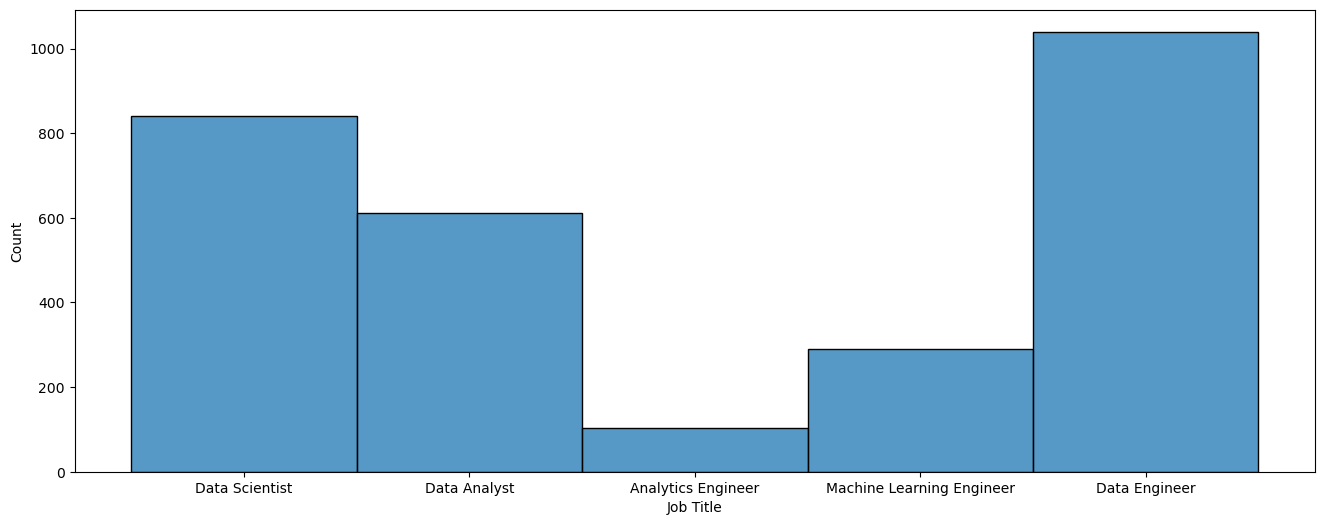

In [12]:
common_jobs = df.loc[(df.job_title == 'Analytics Engineer') | 
       (df.job_title == 'Data Engineer') |
      (df.job_title == 'Data Scientist') |
      (df.job_title == 'Data Analyst') |
      (df.job_title == 'Machine Learning Engineer')]

plt.figure(figsize=(16,6))
plt.xlabel('Job Title')
sns.histplot(common_jobs.job_title)

<Axes: xlabel='salary_in_usd', ylabel='Count'>

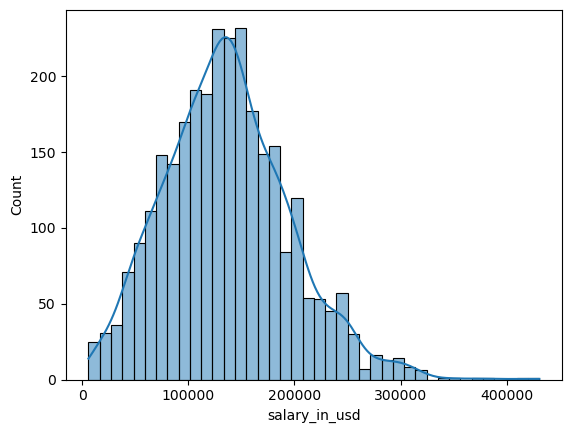

In [13]:
sns.histplot(data = common_jobs.salary_in_usd, kde = True)

We'll dig more into salary once we isolate the data we want.

<Axes: xlabel='remote_ratio', ylabel='Count'>

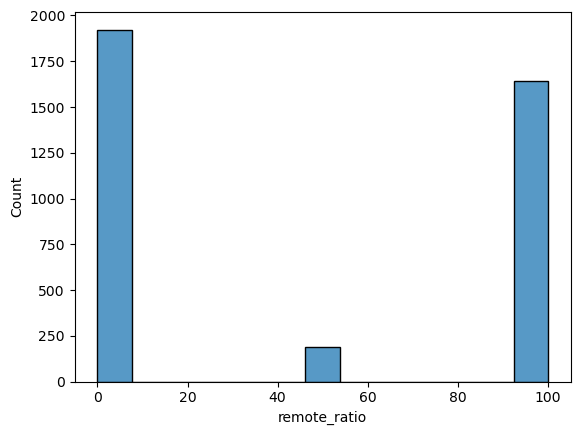

In [14]:
sns.histplot(df.remote_ratio)

In [15]:
df.loc[(df.remote_ratio == 100)].shape[0]/df.shape[0]

0.43754993342210385

Most jobs are either fully remote (44%) or fully in person (51%), with only 5% listed as hybrid.

In [16]:
df.company_size.value_counts()

M    3153
L     454
S     148
Name: company_size, dtype: int64

<Axes: xlabel='experience_level', ylabel='Count'>

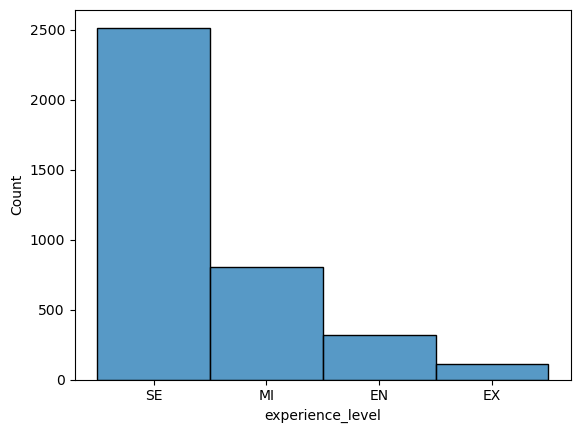

In [17]:
sns.histplot(df.experience_level)

After this initial exploration, I want to narrow the data set to full-time positions in 2022 and 2023 and then isolate the top five most common job titles. From there, we'll inspect relationships involving salary (USD), remote work, and company size.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [19]:
#selecting just the data we want to investigate further
##years 2022 and 2023
df2 = df.loc[(df.work_year == 2022) | (df.work_year == 2023)]
##full time employment
df2 = df2.loc[(df2.employment_type == 'FT')]

#top five most popular jobs
pop_jobs = df2.job_title.value_counts()
df2 = df2.loc[(df2.job_title == pop_jobs.index[0]) | 
             (df2.job_title == pop_jobs.index[1]) |
             (df2.job_title == pop_jobs.index[2]) |
             (df2.job_title == pop_jobs.index[3]) |
             (df2.job_title == pop_jobs.index[4])]

#grabbing the columns we care about
df2 = df2[['job_title', 'salary_in_usd', 'remote_ratio', 'company_size']]

#reindexing
df2.reset_index(drop=True)

df2.head()

,job_title,salary_in_usd,remote_ratio,company_size
3,Data Scientist,175000,100,M
4,Data Scientist,120000,100,M
7,Data Scientist,219000,0,M
8,Data Scientist,141000,0,M
9,Data Scientist,147100,0,M


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2704 entries, 3 to 3490
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   job_title      2704 non-null   object
 1   salary_in_usd  2704 non-null   int64 
 2   remote_ratio   2704 non-null   int64 
 3   company_size   2704 non-null   object
dtypes: int64(2), object(2)
memory usage: 105.6+ KB


<Axes: xlabel='salary_in_usd', ylabel='remote_ratio'>

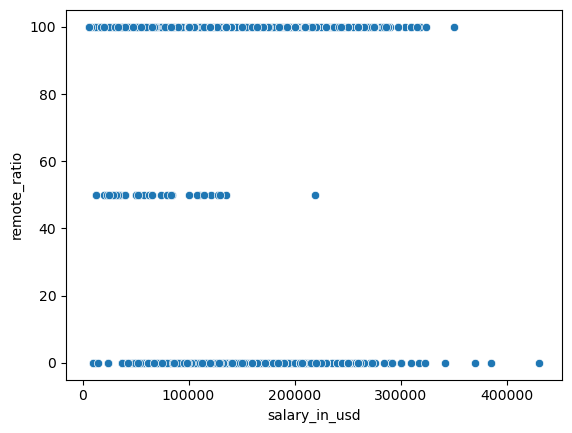

In [21]:
sns.scatterplot(data=df2, x='salary_in_usd', y='remote_ratio')

<Axes: xlabel='job_title', ylabel='salary_in_usd'>

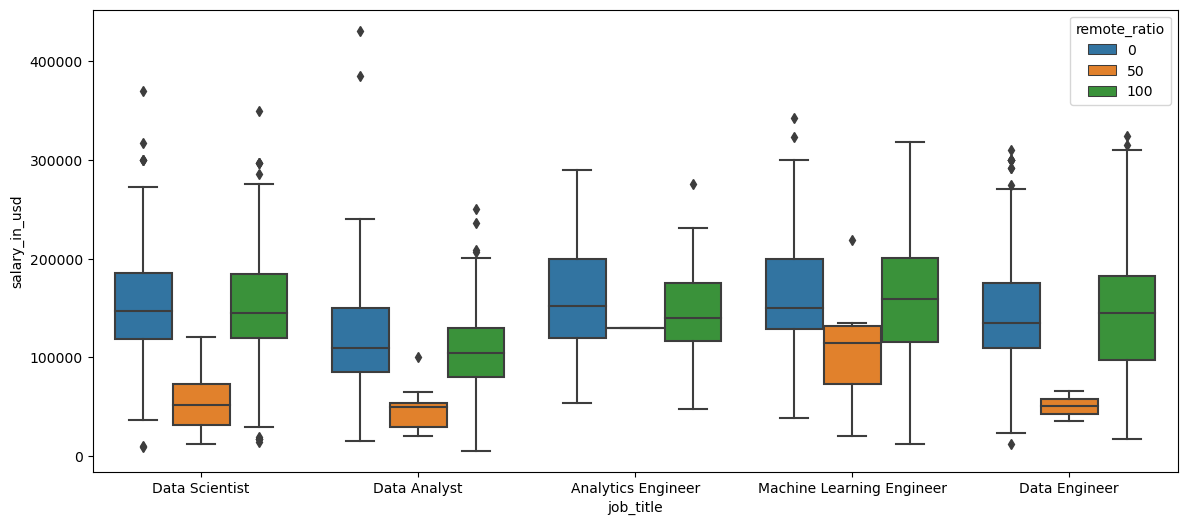

In [22]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df2, x='job_title', y='salary_in_usd', hue='remote_ratio')

<Axes: xlabel='job_title', ylabel='salary_in_usd'>

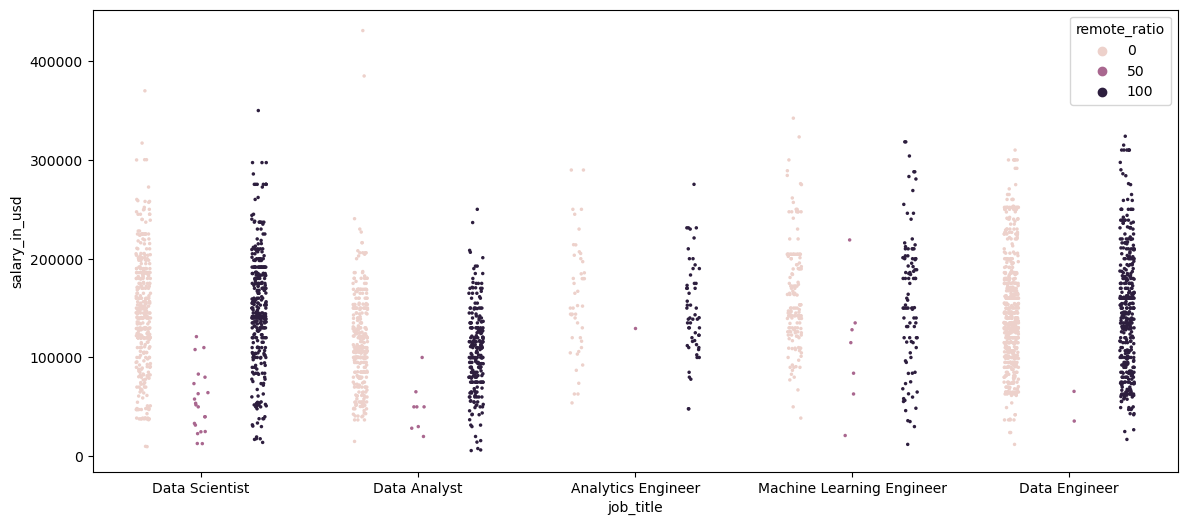

In [38]:
plt.figure(figsize=(14,6))
sns.stripplot(data=df2, x='job_title', y='salary_in_usd', hue = 'remote_ratio', dodge=True, size = 2.5)

<Axes: xlabel='job_title', ylabel='salary_in_usd'>

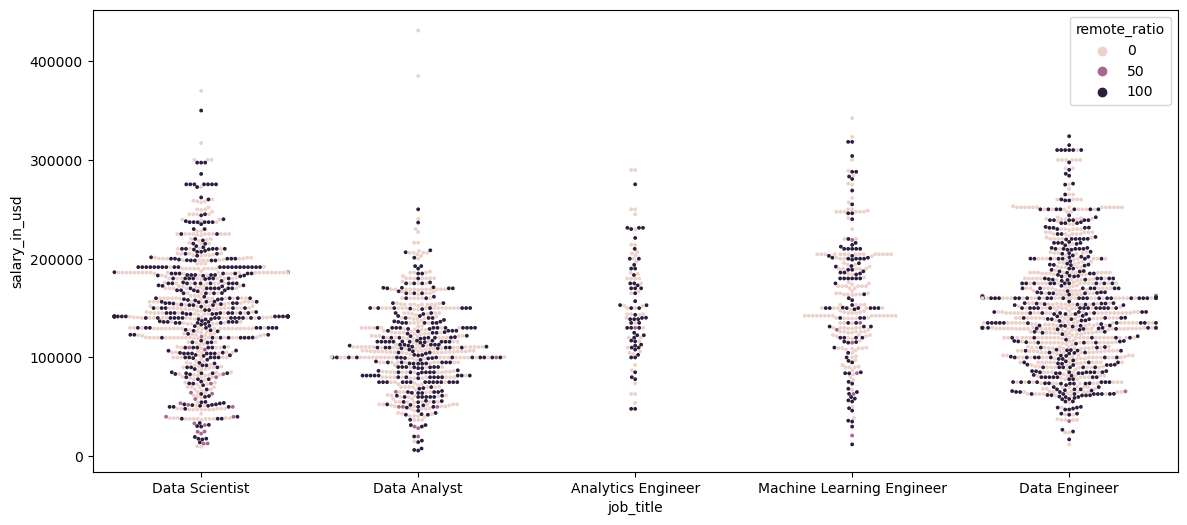

In [40]:
plt.figure(figsize=(14,6))
sns.swarmplot(data=df2, x='job_title', y='salary_in_usd', hue = 'remote_ratio', size = 2.75)

<Axes: xlabel='job_title', ylabel='salary_in_usd'>

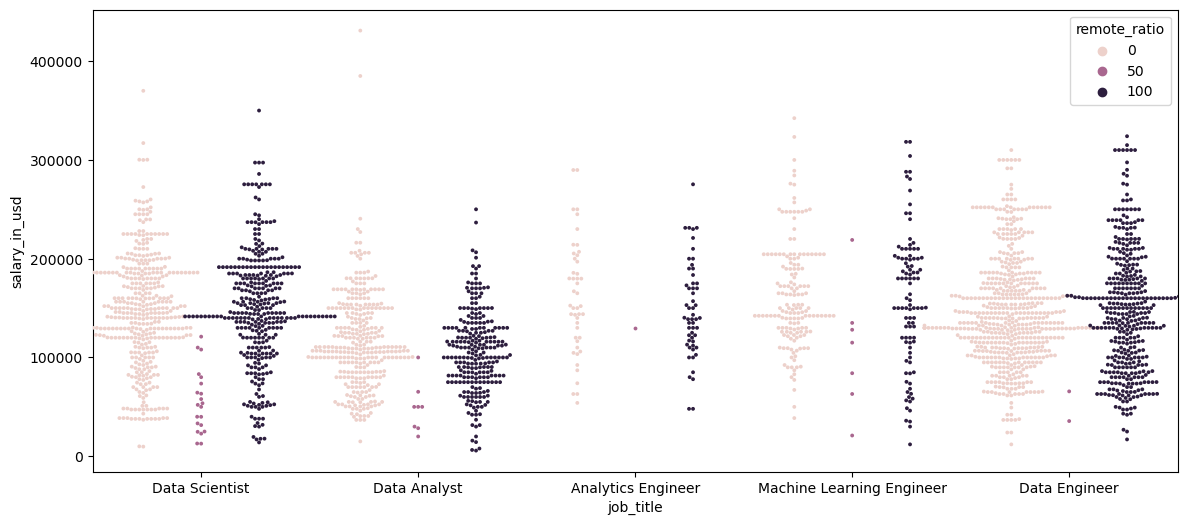

In [41]:
plt.figure(figsize=(14,6))
sns.swarmplot(data=df2, x='job_title', y='salary_in_usd', hue = 'remote_ratio', size = 2.75, dodge= True)

<Axes: xlabel='job_title', ylabel='salary_in_usd'>

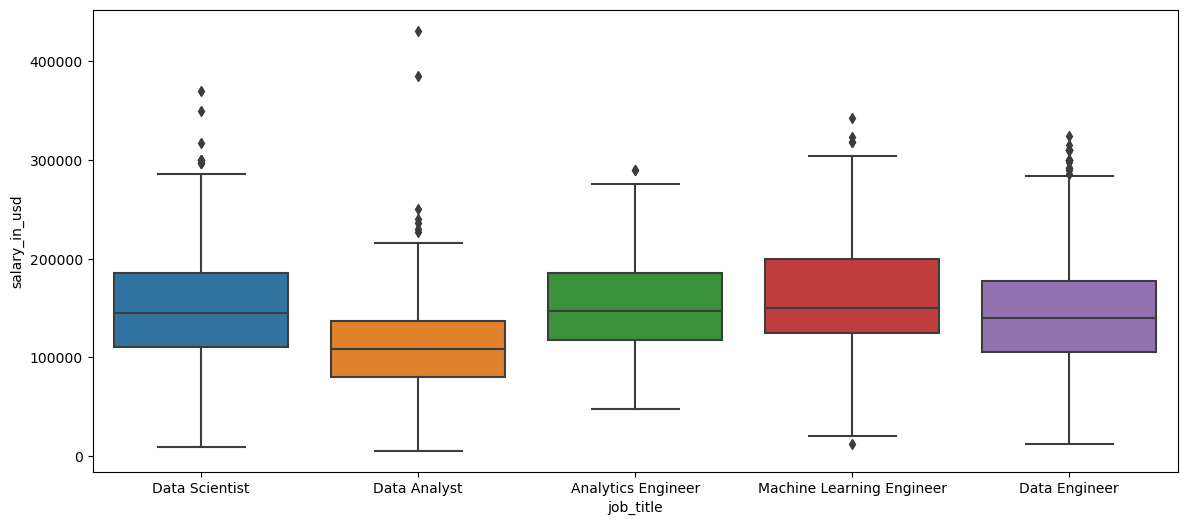

In [42]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df2, x='job_title', y='salary_in_usd')